In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Initialization***

In [17]:
# Importing some library files...
import sklearn
import pandas as pd
import numpy as np
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas.core.dtypes.common import is_numeric_dtype
import pickle
from google.colab import files
import warnings as wr
wr.filterwarnings('ignore')

# Importing ALL THE MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

# Importing evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [18]:
# Fetching the Dataset for training...
path = "/content/drive/MyDrive/Colab Notebooks/linkdin_Job_data7000.csv"
df = pd.read_csv(path)
print(len(df))
df.head()

7927


,job_type,work_type,job_details
0,"Data Analyst, Trilogy (Remote) - $60,000/year USD",Remote,About the job Crossover is the world's #1 sour...
1,"Data Analyst, Trilogy (Remote) - $60,000/year USD",Remote,About the job Crossover is the world's #1 sour...
2,Data Analyst - WFH,Remote,About the job Profile: ML EngineersExperience:...
3,Data Analyst,On-site,About the job Designation: Data AnalystLocatio...
4,Data Analyst,On-site,About the job The ideal candidate will use the...


In [19]:
target = 'job_type'

# ***Dataset Preprocessing***

In [20]:
## Dataset Cleaning ##

print(len(df[target].unique()))
df = df.dropna() # Dropping Nulls
print(len(df[target].unique()))
def clean_class_name(class_name):
    class_name = class_name.split(',')[0]
    class_name = class_name.split(' -')[0]
    class_name = class_name.split('|')[0]
    class_name = class_name.split('(')[0]
    class_name = class_name.split('[')[0]
    return class_name.strip()  # Strip to remove leading/trailing spaces

df[target] = df[target].apply(clean_class_name)
print(len(df[target].unique()))

2992
2924
2556


In [35]:
## Choosing how many classes has enough samples to keep ##

col1 = 'Class_Name'
col2 = 'Class_Count'
col3 = 'Cumulative_Count'
col4 = 'Class_Count_To_Cumulative_Count_Ratio(%)'

class_sample_report = {
    col1 : [],
    col2 : [],
    col3 : [],
    col4 : []
}

# Count occurrences of each class in the 'Class' column
class_counts = df[target].value_counts()
sorted_classes = class_counts.sort_values(ascending=False)

# #
cumulative_count = 0
for class_label, count in sorted_classes.items():
    class_sample_report[col1].append(class_label)
    class_sample_report[col2].append(count)
    cumulative_count += count
    class_sample_report[col3].append(cumulative_count)
    class_sample_report[col4].append(f"{(count/cumulative_count)*100:.2f}%")

class_sample_report = pd.DataFrame(class_sample_report)

In [36]:
class_sample_report.head(60)

,Class_Name,Class_Count,Cumulative_Count,Class_Count_To_Cumulative_Count_Ratio(%)
0,Data Engineer,199,199,100.00%
1,Business Analyst,184,383,48.04%
2,Lead Java Software Engineer,171,554,30.87%
3,Senior Automation Tester,146,700,20.86%
4,Lead Java Developer,120,820,14.63%
5,Data Analyst,119,939,12.67%
6,Lead Automation Tester,116,1055,11.00%
7,Python Developer,113,1168,9.67%
8,Senior Java Software Engineer,101,1269,7.96%
9,Lead .NET Developer,68,1337,5.09%


In [37]:
## Dropping Classes With Too Low Counts ##

# Get the classes with low number of members
classes_to_drop = class_counts[class_counts <= 99].index

# Filter the DataFrame based on classes to drop
df = df[~df[target].isin(classes_to_drop)]
print(len(df))

1269


In [38]:
# Checking sample count for each class
class_counts = df[target].value_counts()
sorted_classes = class_counts.sort_values(ascending=False)

# Print unique classes and their counts in descending order
print("Unique classes in descending order of count:")
for class_label, count in sorted_classes.items():
    print(f"Class: {class_label}, Count: {count}")

Unique classes in descending order of count:
Class: Data Engineer, Count: 199
Class: Business Analyst, Count: 184
Class: Lead Java Software Engineer, Count: 171
Class: Senior Automation Tester, Count: 146
Class: Lead Java Developer, Count: 120
Class: Data Analyst, Count: 119
Class: Lead Automation Tester, Count: 116
Class: Python Developer, Count: 113
Class: Senior Java Software Engineer, Count: 101


In [39]:
skills = [
    "python", "sql", "aws", "data analysis", "communication", "financial analysis", "recruiting",
    "training", "performance management", "advertising", "tableau", "marketing", "excel",
    "sales", "digital marketing", "css", "project management", "html", "writing",
    "content creation", "sem", "social media", "javascript", "erp", "critical thinking",
    "analytics", "crm", "research", "seo", "design", "artificial intelligence",
    "machine learning", "compliance", "accounting", "forecasting", "leadership",
    "audit", "risk management", "legal", "budgeting", "databases", "teamwork", "java",
    "linux", "windows", "network security", "agile", "scrum", "spring", "hibernate",
    "supply chain", "logistics", "operations management", "negotiation", "cisco",
    "quality assurance", "human resources", "business development", "c++", "git",
    "data science", "big data", "deep learning", "hadoop", "spark", "etl",
    "data warehousing", "mysql", "sql server", "docker", "kubernetes", "ci/cd",
    "jenkins", "electrical engineering", "autocad", "matlab", "power systems", "circuit design",
    "organizational skills", "administrative skills", "microsoft office", "react", "angular",
    "web development", "ux/ui design", "safety", "compliance", "auditing", "environmental health",
    "process improvement", "lean manufacturing", "six sigma", "interior design", "3d modeling",
    "photoshop", "financial analysis", "investment strategies", "economics", "troubleshooting",
    "itil", "hardware support", "laboratory skills", "quality control", "chemistry", "biology",
    "instrumentation", "legal research", "transportation management", "planning", "pharmaceutical industry",
    "medical knowledge", "patient care", "healthcare", "time management", "organization",
    "legal documentation", "prototyping", "product development", "creativity", "technical documentation",
    "graphic design", "user research", "fabrication", "metalworking", "blueprint reading",
    "mig/tig welding", "yoga teaching", "fitness", "health and wellness", "flexibility training"
]

skills = list(set(skills))

for skill in skills:
    tmplist = []
    for detail in df["job_details"]:
      tmptext = detail.lower().translate(str.maketrans('', '', string.punctuation)).split(' ')
      flag=0;
      for word in tmptext:
        if word == skill:
          flag=1
          break
      tmplist.append(flag)
    df[skill]=tmplist

In [40]:
df = df.drop("job_details", axis=1)
le = LabelEncoder()
df['work_type'] = le.fit_transform(df['work_type'])
df.tail()

,job_type,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
7739,Data Engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7765,Python Developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7766,Python Developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7897,Python Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7921,Python Developer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df[target]
X = df.drop(target, axis=1)
X.describe()

,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,aws,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
count,1269.000000,1269.0,1269.000000,1269.0,1269.0,1269.0,1269.0,1269.0,1269.000000,1269.000000,...,1269.000000,1269.0,1269.0,1269.0,1269.0,1269.000000,1269.0,1269.000000,1269.0,1269.0
mean,1.501970,0.0,0.018913,0.0,0.0,0.0,0.0,0.0,0.350670,0.449173,...,0.112687,0.0,0.0,0.0,0.0,0.103231,0.0,0.032309,0.0,0.0
std,0.715558,0.0,0.136270,0.0,0.0,0.0,0.0,0.0,0.477368,0.497606,...,0.316335,0.0,0.0,0.0,0.0,0.304380,0.0,0.176889,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
50%,2.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
75%,2.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
max,2.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0


In [42]:
# Splitting Data into Train and Test Sets...
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [43]:
# print(df.isnull().sum())
print(len(skills))
# print(len(filtered_X))
# print(len(filtered_y))
print(len(y.unique()))
print(len(y_train.unique()))
print(len(y_test.unique()))

128
9
9
9


In [44]:
X_test2 = X_test[:1]
X_test2

,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,aws,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
7118,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
#lists initiated that will contain the name of the models and their respective metrics
names = []
scores = []
cross_scores = []
f1=[]
pr=[]

# ***KNN***

In [46]:
classifier = KNeighborsClassifier() # n_neighbors = 5
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# y_pred

In [47]:
y_pred2 = classifier.predict(X_test2)
y_pred2

array(['Business Analyst'], dtype=object)

In [48]:
# Evaluating KNN for Classification...
acc =  classifier.score(X_test, y_test)
print(acc)

0.8050314465408805


Text(0, 0.5, 'F1 Score')

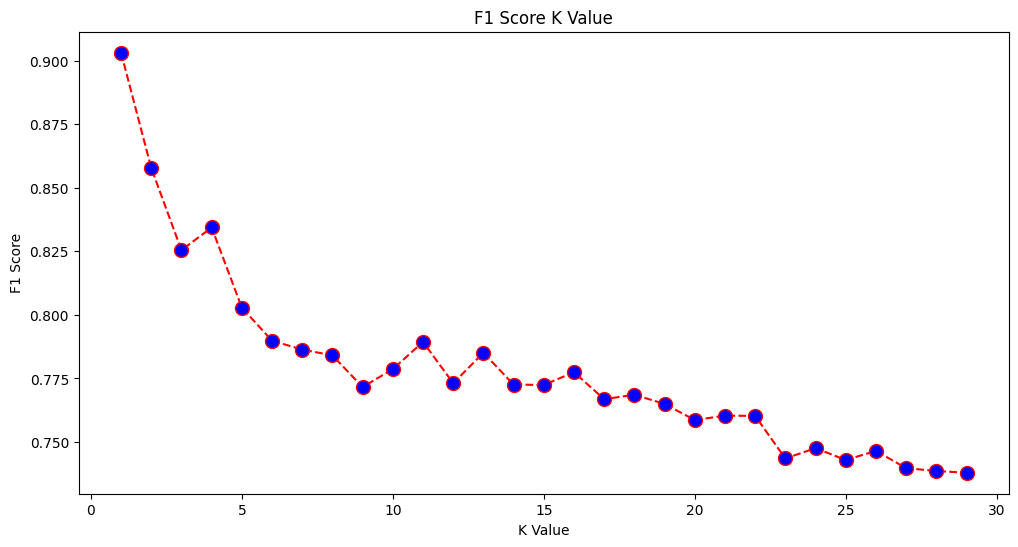

In [49]:
# ============================================
# Finding the Best K for KNN Classification...
# ============================================

f1s_KNN = []

# Calculating f1 score for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # average='weighted' to calculate a weighted average for the classes
    f1s_KNN.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), f1s_KNN, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [50]:
# The f1-score is the highest when the value of the K is...
# Retrain the classifier with best k neighbors...
classifier_best = KNeighborsClassifier(n_neighbors=5)
classifier_best.fit(X_train, y_train)
y_pred_best = classifier_best.predict(X_test)
#print(classification_report(y_test, y_pred_best))

In [51]:
y_pred2_best = classifier_best.predict(X_test2)
y_pred2_best

array(['Business Analyst'], dtype=object)

In [52]:
# Evaluating KNN for Classification...
acc =  classifier_best.score(X_test, y_test)
print(acc)

0.8050314465408805


In [53]:
knn_acc = accuracy_score(y_test, y_pred_best)
print("KNN accuracy:", knn_acc)
knn_accuracy = cross_val_score(classifier_best,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", knn_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('KNN')
scores.append(knn_acc)
cross_scores.append(knn_accuracy.mean())
pr.append(prv)
f1.append(f1v)

KNN accuracy: 0.8050314465408805
Cross-Validation Accuracy: 0.6128968253968254
Precision: 0.8155815776821762
F1 Score: 0.8028487090761249


In [54]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

             Business Analyst       0.66      0.87      0.75        46
                 Data Analyst       0.80      0.53      0.64        30
                Data Engineer       0.81      0.76      0.78        50
       Lead Automation Tester       0.81      0.90      0.85        29
          Lead Java Developer       0.96      0.73      0.83        30
  Lead Java Software Engineer       0.88      1.00      0.93        43
             Python Developer       0.76      0.79      0.77        28
     Senior Automation Tester       0.91      0.78      0.84        37
Senior Java Software Engineer       0.80      0.80      0.80        25

                     accuracy                           0.81       318
                    macro avg       0.82      0.80      0.80       318
                 weighted avg       0.82      0.81      0.80       318



In [55]:
# =============================================================
# Implementing KNN for Outlier Detection with Scikit-Learn...
# =============================================================

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors...
distances, indexes = nbrs.kneighbors(X_train)

# 5 distances for each data point (distance between itself and 5 neighbors)...
distances[:3], distances.shape

(array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 1.41421356, 1.41421356],
        [0.        , 0.        , 0.        , 1.        , 1.        ]]),
 (951, 5))

In [56]:
# Look at the neighbors' indexes for 3 rows...
indexes[:3], indexes[:3].shape

(array([[743,   0,  15, 259, 887],
        [631,   1, 751, 340, 172],
        [ 51,  12,   2, 130, 255]]),
 (3, 5))

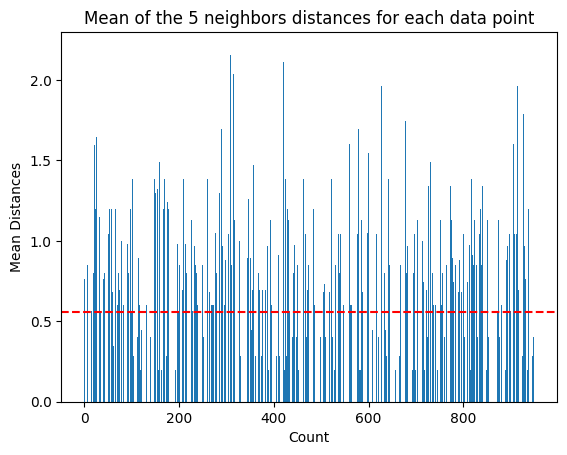

In [57]:
# calculate the mean of the 5 distances and plot a graph that counts
# each row on the X-axis and displays each mean distance on the Y-axis...
dist_means = distances.mean(axis=1)
plt.bar(np.array(range(0, len(y_train))), dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

plt.axhline(y = 0.56, color = 'r', linestyle = '--')

In [58]:
# Visually determine cutoff values > 0.56
outlier_index = np.where(dist_means > 0.56)
outlier_index

(array([  1,   6,   7,  11,  16,  20,  21,  22,  24,  26,  29,  31,  32,
         33,  34,  35,  38,  40,  41,  42,  43,  44,  46,  47,  50,  52,
         53,  54,  57,  58,  59,  60,  65,  66,  67,  71,  72,  73,  74,
         75,  79,  80,  83,  87,  89,  91,  92,  94,  97,  98,  99, 100,
        101, 102, 103, 105, 106, 108, 114, 115, 116, 117, 122, 126, 127,
        131, 132, 133, 137, 139, 143, 146, 147, 149, 151, 152, 155, 156,
        159, 162, 165, 167, 168, 170, 171, 176, 178, 181, 183, 184, 185,
        192, 194, 196, 197, 198, 199, 200, 201, 202, 203, 205, 208, 209,
        210, 211, 213, 214, 216, 217, 222, 226, 227, 228, 229, 230, 232,
        233, 235, 237, 239, 241, 242, 244, 245, 249, 250, 251, 253, 255,
        257, 260, 262, 263, 265, 269, 270, 271, 272, 273, 276, 277, 278,
        279, 280, 283, 284, 285, 286, 287, 290, 291, 292, 296, 297, 298,
        300, 305, 308, 309, 311, 314, 315, 317, 318, 322, 328, 329, 339,
        340, 341, 342, 345, 347, 350, 351, 352, 355

In [59]:
# Filter outlier values (locate them in the dataframe)...
outlier_values = df.iloc[outlier_index]
outlier_values

,job_type,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
1,Data Analyst,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Data Analyst,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,Data Engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,Data Engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,Python Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,Lead Automation Tester,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5308,Senior Automation Tester,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5309,Data Engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5310,Senior Automation Tester,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# ***Decision Tree***

In [60]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# y_pred

In [61]:
y_pred2 = clf.predict(X_test2)
y_pred2

array(['Business Analyst'], dtype=object)

In [62]:
#tree.plot_tree(clf)

In [63]:
#plt.figure(figsize=(10,10)) # For example, (6, 10) represents a figure size of 6 inches in width and 10 inches in height.
#tree.plot_tree(clf, rounded=True, filled=True, feature_names=X.columns)

In [64]:
x_updated=X.columns.tolist() # Convert x.columns to a list of strings
text_rep=tree.export_text(clf, feature_names=x_updated) # Export the decision tree as text representation
print(text_rep)

|--- java <= 0.50
|   |--- work_type <= 1.50
|   |   |--- python <= 0.50
|   |   |   |--- analytics <= 0.50
|   |   |   |   |--- spark <= 0.50
|   |   |   |   |   |--- communication <= 0.50
|   |   |   |   |   |   |--- work_type <= 0.50
|   |   |   |   |   |   |   |--- healthcare <= 0.50
|   |   |   |   |   |   |   |   |--- legal <= 0.50
|   |   |   |   |   |   |   |   |   |--- sql <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- docker <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- docker >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Data Engineer
|   |   |   |   |   |   |   |   |   |--- sql >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Data Engineer
|   |   |   |   |   |   |   |   |--- legal >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Business Analyst
|   |   |   |   |   |   |   |--- healthcare >  0.50
|   |   |   |   |   |   |   |   |--- class: Business 

In [65]:
# Evaluating DT for Classification...
acc =  clf.score(X_test, y_test)
print(acc)

0.8962264150943396


In [66]:
dt_acc = accuracy_score(y_test, y_pred)
print("DT accuracy:", dt_acc)
dt_accuracy = cross_val_score(clf,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", dt_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('DT')
scores.append(dt_acc)
cross_scores.append(dt_accuracy.mean())
pr.append(prv)
f1.append(f1v)

DT accuracy: 0.8962264150943396
Cross-Validation Accuracy: 0.7450892857142858
Precision: 0.8950480377852812
F1 Score: 0.894408292689791


In [67]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

             Business Analyst       0.88      0.91      0.89        46
                 Data Analyst       0.77      0.67      0.71        30
                Data Engineer       0.88      0.86      0.87        50
       Lead Automation Tester       0.88      1.00      0.94        29
          Lead Java Developer       0.90      0.87      0.88        30
  Lead Java Software Engineer       0.96      1.00      0.98        43
             Python Developer       0.96      0.86      0.91        28
     Senior Automation Tester       0.92      0.97      0.95        37
Senior Java Software Engineer       0.92      0.88      0.90        25

                     accuracy                           0.90       318
                    macro avg       0.89      0.89      0.89       318
                 weighted avg       0.90      0.90      0.89       318



# ***Logistic Regression***

In [68]:
lr = LogisticRegression()
lr_clf = lr.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)
print("LR accuracy:", lr_acc)
lr_accuracy = cross_val_score(lr_clf,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", lr_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('LR')
scores.append(lr_acc)
cross_scores.append(lr_accuracy.mean())
pr.append(prv)
f1.append(f1v)

LR accuracy: 0.8270440251572327
Cross-Validation Accuracy: 0.7388888888888889
Precision: 0.8334404336840544
F1 Score: 0.8242389028921752


In [69]:
y_pred2 = lr_clf.predict(X_test2)
y_pred2

array(['Business Analyst'], dtype=object)

In [70]:
# Evaluating LR for Classification...
acc =  lr_clf.score(X_test, y_test)
print(acc)

0.8270440251572327


In [71]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

             Business Analyst       0.71      0.89      0.79        46
                 Data Analyst       0.71      0.57      0.63        30
                Data Engineer       0.84      0.74      0.79        50
       Lead Automation Tester       0.91      0.72      0.81        29
          Lead Java Developer       0.92      0.77      0.84        30
  Lead Java Software Engineer       0.91      1.00      0.96        43
             Python Developer       0.92      0.86      0.89        28
     Senior Automation Tester       0.78      0.97      0.87        37
Senior Java Software Engineer       0.84      0.84      0.84        25

                     accuracy                           0.83       318
                    macro avg       0.84      0.82      0.82       318
                 weighted avg       0.83      0.83      0.82       318



# ***Random Forest***

In [72]:
rmf = RandomForestClassifier()
rmf_clf = rmf.fit(X_train,y_train)
y_pred=rmf_clf.predict(X_test)

rmf_clf_acc = accuracy_score(y_test, y_pred)
print("RMF accuracy:", rmf_clf_acc)
rmf_clf_acc2 = cross_val_score(rmf_clf,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", rmf_clf_acc2.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('RF')
scores.append(rmf_clf_acc)
cross_scores.append(rmf_clf_acc2.mean())
pr.append(prv)
f1.append(f1v)

RMF accuracy: 0.9119496855345912
Cross-Validation Accuracy: 0.903235050978231
Precision: 0.9129999885974728
F1 Score: 0.9096842675509975


In [73]:
y_pred2 = rmf_clf.predict(X_test2)
y_pred2

array(['Business Analyst'], dtype=object)

In [74]:
# Evaluating RMF for Classification...
acc =  rmf_clf.score(X_test, y_test)
print(acc)

0.9119496855345912


In [75]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

             Business Analyst       0.86      0.93      0.90        46
                 Data Analyst       0.86      0.63      0.73        30
                Data Engineer       0.84      0.92      0.88        50
       Lead Automation Tester       0.97      1.00      0.98        29
          Lead Java Developer       0.96      0.83      0.89        30
  Lead Java Software Engineer       0.96      1.00      0.98        43
             Python Developer       0.96      0.93      0.95        28
     Senior Automation Tester       0.97      0.97      0.97        37
Senior Java Software Engineer       0.88      0.92      0.90        25

                     accuracy                           0.91       318
                    macro avg       0.92      0.90      0.91       318
                 weighted avg       0.91      0.91      0.91       318



# ***SVM RBF Kernel***

In [76]:
# Creating an SVM classifier with RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
# Training the model
rbf_svm.fit(X_train, y_train)
# Making predictions on the test data
y_pred = rbf_svm.predict(X_test)

# Calculating the accuracy of the SVM model
rbf_svm_acc = accuracy_score(y_test, y_pred)
print("SVM RBF Kernel accuracy:", rbf_svm_acc)
rbf_svm_acc2 = cross_val_score(rbf_svm,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", rbf_svm_acc2.mean())
prv = precision_score(y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('Rsvm')
scores.append(rbf_svm_acc)
cross_scores.append(rbf_svm_acc2.mean())
pr.append(prv)
f1.append(f1v)

SVM RBF Kernel accuracy: 0.8364779874213837
Cross-Validation Accuracy: 0.8559217415265914
Precision: 0.848606293990308
F1 Score: 0.8327867489564392


In [77]:
y_pred2 = rbf_svm.predict(X_test2)
y_pred2

array(['Business Analyst'], dtype=object)

In [78]:
# Evaluating RMF for Classification...
acc =  rbf_svm.score(X_test, y_test)
print(acc)

0.8364779874213837


In [79]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

             Business Analyst       0.75      0.93      0.83        46
                 Data Analyst       0.82      0.60      0.69        30
                Data Engineer       0.87      0.82      0.85        50
       Lead Automation Tester       0.95      0.62      0.75        29
          Lead Java Developer       0.92      0.73      0.81        30
  Lead Java Software Engineer       0.91      1.00      0.96        43
             Python Developer       0.92      0.86      0.89        28
     Senior Automation Tester       0.72      0.97      0.83        37
Senior Java Software Engineer       0.81      0.84      0.82        25

                     accuracy                           0.84       318
                    macro avg       0.85      0.82      0.83       318
                 weighted avg       0.85      0.84      0.83       318



# ***Multinomial Naive Bayes***

In [80]:
# Create Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Fit the classifier to the training data
mnb.fit(X_train, y_train)
# Predict on the test set
y_pred = mnb.predict(X_test)

mnb_acc = accuracy_score(y_test, y_pred)
print("MNB accuracy:", mnb_acc)
mnb_acc2 = cross_val_score(mnb,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", mnb_acc2.mean())
prv = precision_score(y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('MNB')
scores.append(mnb_acc)
cross_scores.append(mnb_acc2.mean())
pr.append(prv)
f1.append(f1v)

MNB accuracy: 0.6509433962264151
Cross-Validation Accuracy: 0.6677597134196749
Precision: 0.6719479558367867
F1 Score: 0.6470753821803028


In [81]:
y_pred2 = mnb.predict(X_test2)
y_pred2

array(['Business Analyst'], dtype='<U29')

In [82]:
# Evaluating RMF for Classification...
acc =  mnb.score(X_test, y_test)
print(acc)

0.6509433962264151


In [83]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

             Business Analyst       0.64      0.65      0.65        46
                 Data Analyst       0.74      0.47      0.57        30
                Data Engineer       0.68      0.86      0.76        50
       Lead Automation Tester       0.74      0.69      0.71        29
          Lead Java Developer       0.58      0.50      0.54        30
  Lead Java Software Engineer       0.55      0.81      0.65        43
             Python Developer       0.88      0.50      0.64        28
     Senior Automation Tester       0.55      0.57      0.56        37
Senior Java Software Engineer       0.83      0.60      0.70        25

                     accuracy                           0.65       318
                    macro avg       0.69      0.63      0.64       318
                 weighted avg       0.67      0.65      0.65       318



# ***Label Encode Y for ANN and LightGBM***

In [84]:
le1 = LabelEncoder()
ann_y_train = le1.fit_transform(y_train)
ann_y_test = le1.transform(y_test)

In [85]:
print( dict(zip(le1.classes_, le1.transform(le1.classes_)))  )

{'Business Analyst': 0, 'Data Analyst': 1, 'Data Engineer': 2, 'Lead Automation Tester': 3, 'Lead Java Developer': 4, 'Lead Java Software Engineer': 5, 'Python Developer': 6, 'Senior Automation Tester': 7, 'Senior Java Software Engineer': 8}


# ***ANN***

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model = Sequential()
model.add(Dense(units=64, activation=LeakyReLU(alpha=0.01), input_dim=len(skills)+1))
model.add(Dense(units=32, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=16, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=8, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=len(y_train.unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, ann_y_train, epochs=400, batch_size=32)

loss, accuracy = model.evaluate(X_test, ann_y_test)
print(f'Test loss: {loss:.4f}')
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/400
30/30 [==============================] - 1s 2ms/step - loss: 2.1829 - accuracy: 0.1462
Epoch 2/400
30/30 [==============================] - 0s 3ms/step - loss: 2.1067 - accuracy: 0.2766
Epoch 3/400
30/30 [==============================] - 0s 2ms/step - loss: 1.9137 - accuracy: 0.3502
Epoch 4/400
30/30 [==============================] - 0s 2ms/step - loss: 1.5938 - accuracy: 0.4469
Epoch 5/400
30/30 [==============================] - 0s 2ms/step - loss: 1.2641 - accuracy: 0.6162
Epoch 6/400
30/30 [==============================] - 0s 2ms/step - loss: 1.0308 - accuracy: 0.7014
Epoch 7/400
30/30 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.7445
Epoch 8/400
30/30 [==============================] - 0s 2ms/step - loss: 0.7498 - accuracy: 0.8055
Epoch 9/400
30/30 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.8265
Epoch 10/400
30/30 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.8496
Epoch 11/

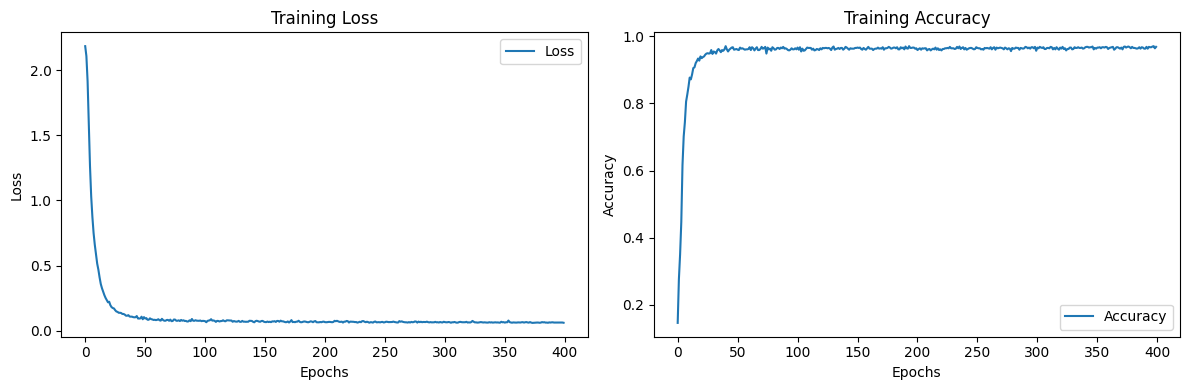

In [87]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8320      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 9)                 81        
                                                                 
Total params: 11145 (43.54 KB)
Trainable params: 11145 (43.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
predictions = model.predict(X_test2)
print(predictions[0]) #outputs 398 probability values of the input feature belonging to that class in contrast to other 397 classes

1/1 [==============================] - 0s 108ms/step
[8.5077107e-01 6.3039297e-06 1.4026269e-01 2.1876775e-05 6.8316303e-06
 6.8008951e-08 7.1874163e-03 5.8629876e-04 1.1575076e-03]


In [90]:
for i,val in enumerate(predictions[0]):  #we will consider the class giving the highest probability as our predicted class
    if val==max(predictions[0]):
        print(f"Class {i}")

Class 0


In [91]:
le1.inverse_transform([np.argmax(predictions[0])])

array(['Business Analyst'], dtype=object)

In [92]:
pred = model.predict(X_test)
pred

10/10 [==============================] - 0s 2ms/step


array([[8.50770891e-01, 6.30392879e-06, 1.40262842e-01, ...,
        7.18741491e-03, 5.86298935e-04, 1.15750683e-03],
       [8.76455999e-07, 1.53387047e-15, 5.71259540e-10, ...,
        1.38549984e-03, 1.24116018e-02, 2.72714146e-07],
       [1.05735545e-08, 3.92438877e-15, 4.90249303e-17, ...,
        3.05735762e-06, 4.07427279e-07, 9.66479204e-16],
       ...,
       [7.46968622e-13, 9.61658880e-19, 1.69190156e-04, ...,
        2.31174839e-04, 1.07158203e-05, 3.58880614e-04],
       [1.21997323e-12, 5.28270179e-12, 9.99995947e-01, ...,
        3.84816985e-06, 2.18531767e-07, 1.71464308e-12],
       [7.25372811e-04, 1.08740723e-03, 9.98172760e-01, ...,
        1.44496826e-05, 9.87357183e-08, 1.36704381e-08]], dtype=float32)

In [93]:
pred2 = []
for i in range(len(pred)):
  pred2.append(np.argmax(pred[i]))
pred2

[0,
 3,
 3,
 1,
 0,
 0,
 5,
 2,
 7,
 6,
 6,
 1,
 5,
 4,
 3,
 5,
 3,
 5,
 3,
 7,
 2,
 5,
 5,
 0,
 4,
 2,
 8,
 5,
 2,
 4,
 2,
 2,
 3,
 0,
 5,
 6,
 2,
 0,
 1,
 7,
 2,
 2,
 1,
 2,
 8,
 0,
 3,
 1,
 3,
 0,
 6,
 5,
 0,
 4,
 0,
 2,
 4,
 0,
 0,
 4,
 3,
 8,
 8,
 1,
 2,
 6,
 7,
 3,
 6,
 4,
 7,
 2,
 4,
 2,
 4,
 4,
 7,
 0,
 0,
 0,
 5,
 0,
 5,
 5,
 4,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 8,
 3,
 1,
 4,
 6,
 7,
 7,
 2,
 1,
 0,
 5,
 5,
 2,
 2,
 7,
 6,
 2,
 0,
 7,
 3,
 4,
 1,
 2,
 2,
 0,
 7,
 7,
 5,
 0,
 5,
 2,
 6,
 7,
 4,
 0,
 7,
 2,
 3,
 2,
 4,
 3,
 6,
 4,
 3,
 2,
 5,
 3,
 2,
 0,
 1,
 5,
 0,
 0,
 0,
 6,
 2,
 4,
 5,
 4,
 7,
 0,
 0,
 2,
 8,
 3,
 4,
 5,
 6,
 2,
 7,
 7,
 5,
 2,
 0,
 7,
 7,
 5,
 4,
 0,
 5,
 8,
 4,
 6,
 1,
 6,
 7,
 2,
 1,
 2,
 3,
 5,
 3,
 0,
 0,
 8,
 0,
 5,
 2,
 6,
 5,
 5,
 1,
 8,
 5,
 6,
 2,
 2,
 2,
 2,
 0,
 6,
 5,
 8,
 7,
 3,
 5,
 3,
 1,
 3,
 7,
 8,
 4,
 5,
 2,
 8,
 2,
 1,
 0,
 5,
 7,
 5,
 7,
 5,
 6,
 7,
 6,
 2,
 0,
 6,
 2,
 0,
 5,
 7,
 2,
 7,
 5,
 7,
 7,
 2,
 0,
 1,
 7,
 0,
 1,
 8,
 5,
 6,
 0,


In [94]:
y_pred = pred2

ann_acc = accuracy_score(ann_y_test, y_pred)
print("ANN accuracy:", ann_acc)
# ann_acc2 = cross_val_score(model,X_train,ann_y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", ann_acc)
prv = precision_score(ann_y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(ann_y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('ANN')
scores.append(ann_acc)
cross_scores.append(ann_acc)
pr.append(prv)
f1.append(f1v)

ANN accuracy: 0.9056603773584906
Cross-Validation Accuracy: 0.9056603773584906
Precision: 0.9072215764912501
F1 Score: 0.9040480598579692


# ***LightGBM***

In [95]:
import lightgbm as lgb

#set the training data
train_data = lgb.Dataset(X_train, label=ann_y_train)

# Set parameters for LGBM classifier
params = {'objective': 'multiclass', 'num_classes': len(y_train.unique()), 'random_state': 42, 'learning_rate': 0.1, 'num_iterations': 1000}

#Create and Train an LGBM classifier
lgb_classifier = lgb.train(params, train_data)

# Predict on test set and evaluate accuracy
y_pred_lgb = lgb_classifier.predict(X_test)
y_pred_lgb

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

array([[9.97000353e-01, 8.68226487e-06, 2.26390905e-03, ...,
        2.86620494e-05, 6.96436586e-04, 1.68061050e-06],
       [9.99891114e-01, 8.36593490e-08, 5.55861657e-06, ...,
        1.88407311e-05, 5.34666562e-08, 1.05696096e-05],
       [1.04314198e-04, 1.27133158e-06, 7.89718075e-06, ...,
        3.02543651e-06, 3.09317393e-05, 3.36630947e-07],
       ...,
       [2.93273753e-04, 1.23796968e-06, 1.52059680e-08, ...,
        1.14302958e-06, 1.25614451e-07, 2.89009650e-04],
       [2.96432749e-07, 1.85595320e-06, 9.99893266e-01, ...,
        5.49590066e-05, 2.83198650e-05, 8.07219429e-07],
       [9.84397791e-04, 2.89127048e-03, 9.96119939e-01, ...,
        3.40117362e-07, 3.07032320e-06, 3.05627614e-07]])

In [96]:
# y_pred_lgb_bin = [1 if x > 0.5 else 0 for x in y_pred_lgb]
pred2 = []
for i in range(len(y_pred_lgb)):
  pred2.append(np.argmax(y_pred_lgb[i]))
y_pred_lgb_bin = pred2

In [97]:
accuracy_lgb = accuracy_score(ann_y_test, y_pred_lgb_bin)
print("Accuracy of LGBM Classifier:",accuracy_lgb)
# accuracy_lgb2 = cross_val_score(lgb_classifier,X_train,ann_y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", accuracy_lgb)
prv = precision_score(ann_y_test,y_pred_lgb_bin,average="weighted")
print("Precision:", prv)
f1v = f1_score(ann_y_test,y_pred_lgb_bin,average="weighted")
print("F1 Score:", f1v)

names.append('LGB')
scores.append(accuracy_lgb)
cross_scores.append(accuracy_lgb)
pr.append(prv)
f1.append(f1v)

Accuracy of LGBM Classifier: 0.9056603773584906
Cross-Validation Accuracy: 0.9056603773584906
Precision: 0.9049780345303158
F1 Score: 0.9028048318599484


# ***Comparing model performances***

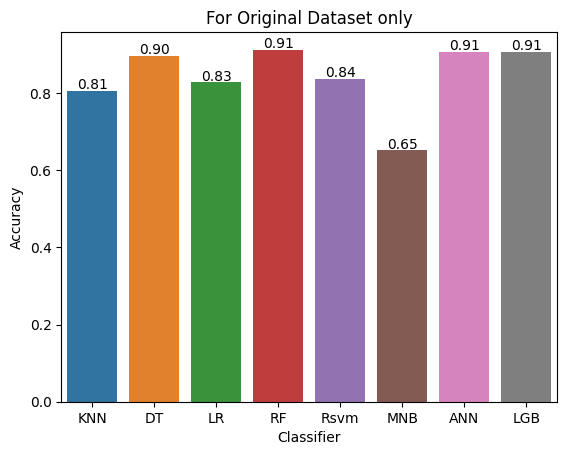

In [98]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': scores}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

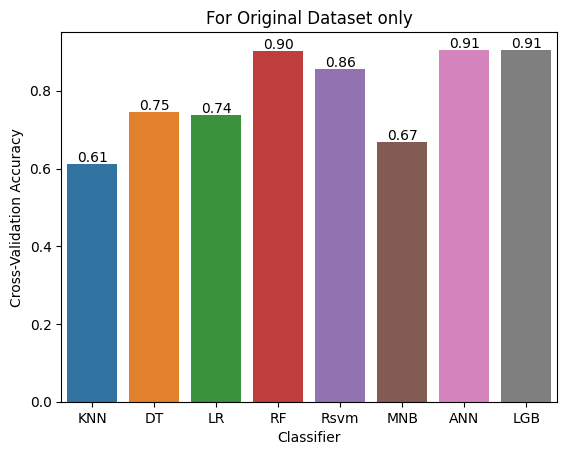

In [99]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': cross_scores}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Cross-Validation Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

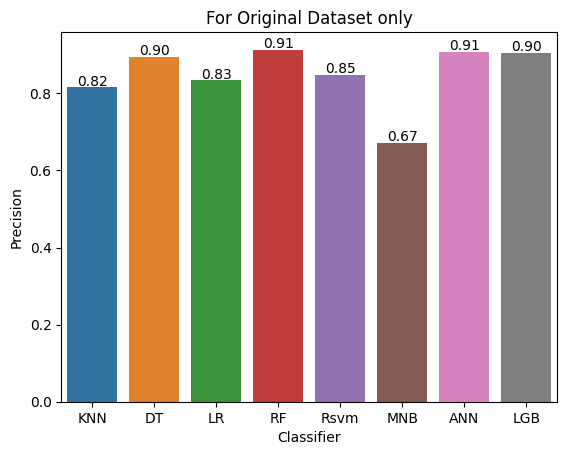

In [100]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': pr}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

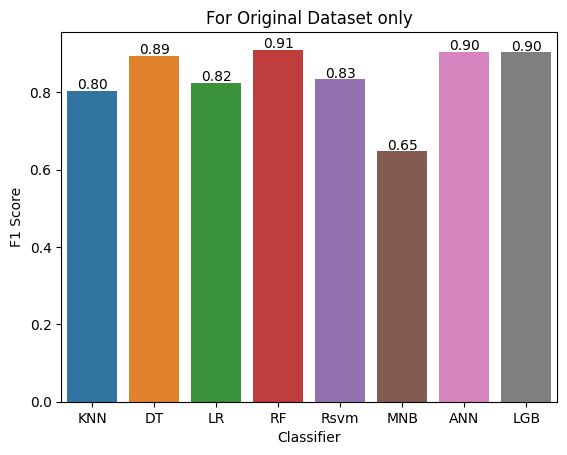

In [101]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': f1}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='F1 Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

# ***Downloading PKL Files***

In [102]:
# with open('le.pkl', 'wb') as file:
#     pickle.dump(le, file)
# files.download("le.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
# with open('ML_model.pkl', 'wb') as file:
#     pickle.dump(rmf_clf, file)
# files.download("ML_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
# If ANN is chosen
# with open('le1.pkl', 'wb') as file:
#     pickle.dump(le1, file)
# files.download("le1.pkl")

# ***PLAY SOUND ONCE ALL THE CODES ARE EXECUTED***

In [105]:
from IPython.display import HTML
# Display the HTML element
display(HTML(f"""<audio controls autoplay loop><source src='http://codeskulptor-demos.commondatastorage.googleapis.com/descent/gotitem.mp3' type="audio/mpeg"></audio>"""))